# Modelo de Regresión Lineal Simple

> Ecuación de la recta: **y = mx + b**
>
> **Y** Es la variable dependiente - **la que vamos a predecir**
>
> **X** Es la variable independiente

# Suposiciones

> Relación lineal
>
> Normalidad
>
> No multicolinealidad
>
> No auto-correlación
>
> Varianzas iguales

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
datos = pd.read_csv("ingreso.csv")
datos

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203
...,...,...
995,9998.522402,41.110352
996,6867.097603,40.617061
997,9757.539280,40.798085
998,11044.031510,41.443604


> En los datos presentados, tenemos la **variable dependiente** que corresponde al **ingreso** y la **variable independiente** que corresponde a las **horas** trabajadas por cada empleado.

### Graficamos los datos para ver como se presentan y entender la distribución de los mismos.

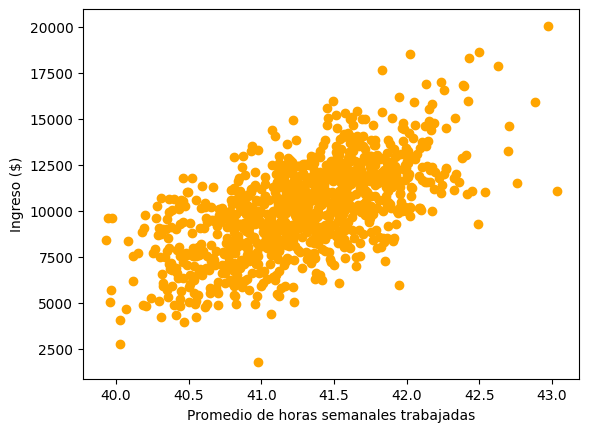

In [7]:
plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="orange")
plt.show()

> En esta **gráfica de dispersión**, podemos ver si los datos tienen una **relación lineal** entre las 2 variables.
    >> Como podemos ver, efectivamente hay una relación lineal entre las dos variables. Si trazamos una línea recta transversal sobre la diagonal desde el punto cero, vemos como una gran cantidad de puntos se ajustaría a la línea.
>
> Con esto entonces, vamos a programar nuestra **regresión lineal simple** donde vamos apredecir el ingreso de las personas en función del número de horas semanales trabajadas. 

In [8]:
# Importamos nuestra libreria y el módulo a usar para este propósito
from sklearn import linear_model

In [11]:
# Creamos un creador de modelos de regresión lineal
regresion = linear_model.LinearRegression()

> Ahora preparamos los datos. Recordemos que tenemos una solia variable de entrada y una sola variable a predecir.

> Como podemos usar multiples variables de entrada para predecir una variable objetivo, por lo que requerimos que nuestros datos de entrada tenga un formato definido.

> Nuestro dataframe ya esta cargado con una variable "horas". Esos datos, deben estar en un vector para ajustarnos al tipo de dato de entrada que requiere nuestro creador de modelos lineales.

In [12]:
datos["horas"].values.reshape((-1, 1))

array([[40.90547645],
       [41.57648349],
       [41.36923875],
       [41.53721065],
       [40.44120331],
       [41.14248397],
       [40.6538416 ],
       [41.10474124],
       [41.16330439],
       [41.99282312],
       [40.81829105],
       [41.79740894],
       [41.54968908],
       [41.94595668],
       [42.25682698],
       [41.42071574],
       [41.11936055],
       [41.43981372],
       [40.81609424],
       [42.05745525],
       [41.22442225],
       [42.12842578],
       [41.02596417],
       [41.83003331],
       [41.53446874],
       [41.19208408],
       [41.0608824 ],
       [41.36639293],
       [40.97357054],
       [41.434279  ],
       [40.19363772],
       [40.81339645],
       [40.81883683],
       [41.32268672],
       [39.96872157],
       [42.166788  ],
       [41.46597297],
       [40.96627782],
       [40.61438484],
       [41.28975014],
       [41.6577266 ],
       [41.09909329],
       [42.75641196],
       [41.83140068],
       [41.43067502],
       [41

> Como vemos, de los datos en su variable horas, accedemos a **values** que es el array de numpy que se encuentra en nuestra serie de dataframe y reajustamos la forma ya que requerimos un vector que tenga multiples vectores y que cada uno de esos vectores, sea cada uno de nuestros datos.

> Con (-1, 1), le decimos: termina automáticamente el número de elementos que tenemos y queremos vectores de un solo elemento.

> Ahora que hemos dado el formato adecuado a nuestros datos, vamos asignar esto a una variable para hacer mas fácil su llamado y creamos nuestro modelo.

In [13]:
horas = datos["horas"].values.reshape((-1, 1))

modelo = regresion.fit(horas, datos["ingreso"])



> Como vemos, vamos a usar nuestro creador de modelos llamado regresión
>
> Usamos el método **fit()** con el cuál le decimos, **ajusta una línea a los datos que te vamos a dar**.
>
> al método fit, le pasamos como primer parámetro los datos de la variable independiente(horas) y como segundo parámetro, los datos de la variable dependiente(ingreso que esta en datos.).
>
> Al ejecutar, ya tendríamos nuestro modelo pero, recordemos que este modelo corresponde a la ecuación de una línea recta y que lo único que necesitamos es el punto de intersección de esa línea recta con el eje "Y" a demás de su pendiente.
>
> Vamos a imprimir y ver que tenemos.

In [14]:
print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

Intersección (b) -112320.22713310868
Pendiente (m) [2965.35614382]


> Como vemos, en el eje de las **Y** se intercepta en el punto **-112320.2271...** y que a demás es negativo.
> Y la pendiente en cambio, tenemos un valor de **2965.3561...** el cuál es positivo.
>
    >> La interpretación que le podemos en este caso a la pendiente es que, **para cada hora trabajada por loe empleados, aumenta el salario en casi 3000 pesos.**
>
> Ahora, con estos datos, vamos a hacer la predicción.

In [15]:
# Definimos un vector de entrada donde, tendremos 4 vectores este ejemplo en los que indicaremos una cantidad x de horas trabajadas. Al ejecutarlo, vamos a tener un arreglo con el resultado de la predicción donde se nos dice cual es el potencial salario de las personas en función de las horas trabajadas.
entrada = [[39], [40], [43], [44]]
modelo.predict(entrada)

array([ 3328.6624759 ,  6294.01861972, 15190.08705118, 18155.443195  ])

> Como vemos, una persona que trabaja **39 horas** tiene en promedio un salario de **3328.66**, una persona que trabaja **40 horas** tiene en promedio un salario de **6294.01**, una persona que trabaja **43 horas** tiene en promedio un salario de **15190.08** y una persona que trabaja **44 horas** tiene en promedio un salario de **18155.44**.
>
> Si miramos estos datos en conparación con la pendiente, **los saltos que da en salario con respecto al otro cuando son contiguos, son exactamente el valor de la pendiente**. Lo cual es que tanto cambia el salario para cada hora que un empleado trabaja.
>
> Ahora, vamos a graficar estos datos para tener una mejor idea de lo que nos muestra nuestro modelo.

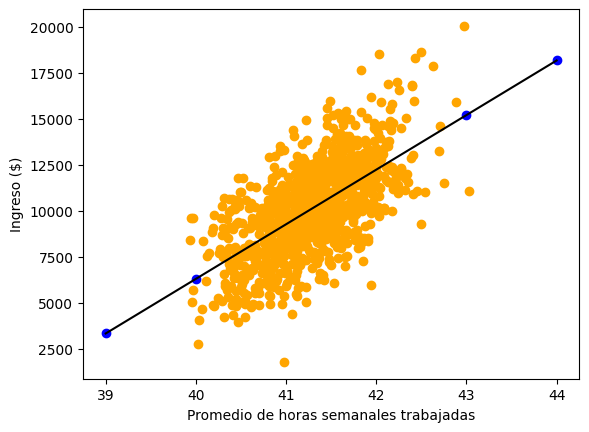

In [16]:
plt.scatter(entrada, modelo.predict(entrada), color="blue")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="orange")
plt.show()

> Como vemos, nuestro modelo es la linea negra que trazamos.
>
> Se ajusta muy bien a los datos entregados.
>
> Les dejo el código completo del modelo para facilitar su lectura e implementación.

In [ ]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

horas = datos["horas"].values.reshape((-1, 1))

modelo = regresion.fit(horas, datos["ingreso"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada = [[39.5], [40], [43], [43.5]]
modelo.predict(entrada)

plt.scatter(entrada, modelo.predict(entrada), color="red")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="pink", alpha=0.55)
plt.show()